In [1]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import keras
import pickle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import ZeroPadding2D
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization

%matplotlib inline

/home/thalvadzhiev_gmail_com/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
with open("faces_dataset_conv.pickle", "rb") as f:
    data = pickle.load(f)

In [38]:
train_ds = data["train_dataset"]
train_labels = data["train_labels"]
pub_test_ds = data["public_test"]
pub_test_labels = data["public_test_labels"]
priv_test_ds = data["private_test"]
priv_test_labels = data["private_test_labels"]

In [4]:
priv_test_labels_no_cat = data["private_test_labels"]
train_labels_no_cat = data["train_labels"]
pub_test_labels_no_cat = data["public_test_labels"]


In [39]:
train_ds = train_ds.reshape(train_ds.shape[0], 48, 48, 1)
pub_test_ds = pub_test_ds.reshape(pub_test_ds.shape[0], 48, 48, 1)
priv_test_ds = priv_test_ds.reshape(priv_test_ds.shape[0], 48, 48, 1)

train_bigger = np.vstack([train_ds, pub_test_ds])

train_labels = np_utils.to_categorical(train_labels, 7)
pub_test_labels = np_utils.to_categorical(pub_test_labels, 7)
priv_test_labels = np_utils.to_categorical(priv_test_labels, 7)

train_bigger_labels = np.concatenate([train_labels, pub_test_labels])


train_labels = np_utils.to_categorical(train_labels, 7)
pub_test_labels = np_utils.to_categorical(pub_test_labels, 7)
priv_test_labels = np_utils.to_categorical(priv_test_labels, 7)
train_bigger_labels = np.concatenate([train_labels, pub_test_labels])

In [6]:
def get_221_model2(weights=None):
    model = Sequential()
    model.add(ZeroPadding2D(padding=(3, 3), input_shape=(48, 48, 1)))
    model.add(Convolution2D(filters=128, kernel_size=4, data_format="channels_last"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.2))
    
    model.add(ZeroPadding2D(padding=(3, 3)))
    model.add(Convolution2D(filters=128, kernel_size=4, data_format="channels_last"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    
    model.add(Convolution2D(filters=128, kernel_size=4, padding="same", data_format="channels_last"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Dropout(0.2))
    
    model.add(ZeroPadding2D(padding=(3, 3)))
    model.add(Convolution2D(filters=128, kernel_size=4, data_format="channels_last"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    
    model.add(Convolution2D(filters=128, kernel_size=4, padding="same", data_format="channels_last"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Dropout(0.2))
    
    model.add(ZeroPadding2D(padding=(3, 3)))
    model.add(Convolution2D(filters=128, kernel_size=4, data_format="channels_last"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    
    model.add(Convolution2D(filters=128, kernel_size=4, padding="same", data_format="channels_last"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    ##fully connected
    model.add(Dense(units=1024))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1024))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=7, activation="softmax"))
    
    if weights:
        model.load_weights(weights)
    
    return model

In [7]:
model_221 = get_221_model2("weights-improvement-model2-10-0.61.hdf5")

In [8]:
model_221.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
import time

In [10]:
from keras.layers import Conv2D, Activation, BatchNormalization, SeparableConv2D,MaxPooling2D,GlobalAveragePooling2D
from keras import Model
from keras import layers

In [11]:
start = time.time()
model_221.predict(np.array([priv_test_ds[25]]))
print(time.time() - start)

10.82778549194336


In [12]:
def mini_XCEPTION(input_shape, num_classes, l2_regularization=0.01):
    regularization = l2(l2_regularization)

    # base
    img_input = Input(input_shape)
    x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
                                            use_bias=False)(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
                                            use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # module 1
    residual = Conv2D(16, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(16, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(16, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    # module 2
    residual = Conv2D(32, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(32, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(32, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    # module 3
    residual = Conv2D(64, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(64, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(64, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    # module 4
    residual = Conv2D(128, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(128, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(128, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    x = Conv2D(num_classes, (3, 3),
            #kernel_regularizer=regularization,
            padding='same')(x)
    x = GlobalAveragePooling2D()(x)
    output = Activation('softmax',name='predictions')(x)

    model = Model(img_input, output)
    return model

In [13]:
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np

In [14]:
from keras.regularizers import l2
from keras.layers import Input

In [15]:
model_xc = mini_XCEPTION((48, 48, 1), 7)
model_xc.load_weights("weights_mini_xception.62-0.65.hdf5")
model_xc.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model_xc.predict(np.array([priv_test_ds[2]]))


array([[5.7262760e-02, 1.7558166e-05, 4.3494284e-01, 1.0587615e-02,
        2.4287234e-01, 4.4593818e-02, 2.0972303e-01]], dtype=float32)

In [17]:
from keras.models import load_model

In [18]:
model_custom = load_model("experiment_2.hdf5")

In [20]:
model_custom.load_weights("best_experiment_2.hdf5")

## Stacking

In [46]:
from sklearn.linear_model import LogisticRegression

In [41]:
prediction_221 = model_221.predict(train_ds)
prediction_xc = model_xc.predict(train_ds)
both_preds = np.hstack([prediction_221, prediction_xc])

In [60]:
both_preds.shape

(3589, 14)

In [70]:
regression = LogisticRegression(C=1)
regression.fit(both_preds, train_labels_no_cat)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
pred_priv_test_221 = model_221.predict(priv_test_ds)
pred_pub_test_221 = model_221.predict(pub_test_ds)


pred_priv_test_xc = model_xc.predict(priv_test_ds)
pred_pub_test_xc = model_xc.predict(pub_test_ds)

pred_priv_both = np.hstack([pred_priv_test_221, pred_priv_test_xc])
pred_pub_both = np.hstack([pred_pub_test_221, pred_pub_test_xc])

In [22]:
regression.score(pred_pub_both, pub_test_labels_no_cat)

0.6653663973251602

In [50]:
from sklearn.svm import SVC

In [73]:
svc = SVC(C=1)
svc.fit(both_preds, train_labels_no_cat)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
svc.score(pred_pub_both, pub_test_labels_no_cat)

0.6678740596266369

In [17]:
import cv2, numpy as np

from PIL import Image

In [18]:
s=224
def resize_images(images,size=(s,s)):
  resized=[]
  for im in images:
    resized.append(np.array(Image.fromarray(np.uint8(cv2.cvtColor(im, cv2.COLOR_GRAY2RGB) * 255) , 'RGB').resize(size)).reshape(*size,3))
    
  return np.array(resized)    

In [19]:
train_ds_res = train_ds.reshape(train_ds.shape[0], 48, 48)
pub_test_ds_res = pub_test_ds.reshape(pub_test_ds.shape[0], 48, 48)
priv_test_ds_res = priv_test_ds.reshape(priv_test_ds.shape[0], 48, 48)

In [29]:
train_ds_res.shape

(28709, 48, 48)

In [20]:
resized_training = resize_images(train_ds_res)
resized_pub_test = resize_images(pub_test_ds_res)
resized_priv_test = resize_images(priv_test_ds_res)

## Vgg model

In [21]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import keras
import pickle

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras import Model
import cv2, numpy as np

from PIL import Image

%matplotlib inline

with open("faces_dataset_conv.pickle", "rb") as f:
    data = pickle.load(f)
    

In [22]:
train_ds = data["train_dataset"]
train_labels = data["train_labels"]
pub_test_ds = data["public_test"]
pub_test_labels = data["public_test_labels"]
priv_test_ds = data["private_test"]
priv_test_labels = data["private_test_labels"]

In [23]:
train_ds_res = train_ds.reshape(train_ds.shape[0], 48, 48)
pub_test_ds_res = pub_test_ds.reshape(pub_test_ds.shape[0], 48, 48)
priv_test_ds_res = priv_test_ds.reshape(priv_test_ds.shape[0], 48, 48)

train_labels = np_utils.to_categorical(train_labels, 7)
pub_test_labels = np_utils.to_categorical(pub_test_labels, 7)
priv_test_labels = np_utils.to_categorical(priv_test_labels, 7)

In [24]:
s=224
from keras_vggface.vggface import VGGFace
modelReady = VGGFace(include_top=True, input_shape=(s,s,3))

In [25]:
def resize_images(images,size=(s,s)):
  resized=[]
  for im in images:
    resized.append(np.array(Image.fromarray(np.uint8(cv2.cvtColor(im, cv2.COLOR_GRAY2RGB) * 255) , 'RGB').resize(size)).reshape(*size,3))
    
  return np.array(resized)    

In [26]:
resized_training = resize_images(train_ds_res)
resized_pub_test = resize_images(pub_test_ds_res)
resized_priv_test = resize_images(priv_test_ds_res)

In [27]:
resized_train_big = np.vstack([resized_training, resized_priv_test])
resized_train_labels_big = np.concatenate([train_labels, priv_test_labels])

In [28]:
from keras.callbacks import ModelCheckpoint

In [29]:
from keras.utils import multi_gpu_model

In [30]:
s=224
from keras_vggface.vggface import VGGFace
model2 = VGGFace(include_top=True, input_shape=(s,s,3))

In [31]:
model2.layers.pop()
model2.layers.pop()
# modelReady.layers.pop()
##remove last two layers
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
__________

In [32]:
nb_class=7
last_layer = model2.get_layer('fc7/relu').output
# x = Flatten(name='flatten')(last_layer)
# x = Dense(hidden_dim, activation='relu', name='fc6')(x)
# x = Dense(hidden_dim, activation='relu', name='fc7')(x)
out = Dense(nb_class, activation='softmax', name='fc8')(last_layer)
model_fc6_trainable = Model(model2.input, out)

model_fc6_trainable.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
__________

In [33]:
parallel_model_2 = multi_gpu_model(model_fc6_trainable, gpus=2)
opt = SGD(lr=0.0001, decay=0.0005, momentum=0.9, nesterov=True)

parallel_model_2.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
checkpoint2 = ModelCheckpoint('weights_emotion_vgg_all_layer_trainable.hdf5', monitor='val_acc', verbose=1, save_best_only=True,
                        save_weights_only=True, mode='max')
parallel_model_2.load_weights("weights_emotion_vgg_all_layer_trainable.hdf5")

In [34]:
parallel_model_2.evaluate(resized_pub_test, pub_test_labels, batch_size=64)

3589/3589 [==============================] - 25s 7ms/step


[2.0736898142967957, 0.6703817219447212]

## Get prediction out of vgg

In [35]:
pred_train_vgg = parallel_model_2.predict(resized_training)
pred_pub_test_vgg = parallel_model_2.predict(resized_pub_test)
pred_priv_test_vgg = parallel_model_2.predict(resized_priv_test)

In [36]:
pred_train_vgg.shape

(28709, 7)

## Get prediction out of custom model

In [40]:
pred_train_custom = model_custom.predict(train_ds)
pred_pub_test_custom = model_custom.predict(pub_test_ds)
pred_priv_test_custom = model_custom.predict(priv_test_ds)

## Final stacking

In [43]:
all_train = np.hstack([pred_train_custom, pred_train_vgg, both_preds])

In [44]:
all_pub = np.hstack([pred_pub_test_custom, pred_pub_test_vgg, pred_pub_both])
all_priv = np.hstack([pred_priv_test_custom, pred_priv_test_vgg, pred_priv_both])

In [57]:
regres = LogisticRegression(C=0.001)
regres.fit(all_train, train_labels_no_cat)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
regres.score(all_pub, pub_test_labels_no_cat)

0.7105043187517415

In [73]:
np.argmax(regres.predict_proba(all_pub), axis=1).shape

(3589,)

In [61]:
svc = SVC(C=0.01)
svc.fit(all_train, train_labels_no_cat)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
svc.score(all_pub, pub_test_labels_no_cat)

0.7001950404012259

## Confusion matrices

In [65]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
def get_conf_matrix(model, test_ds, test_labels):
    names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
    print("Predicting...")
    pred = model.predict(test_ds)
    pred = np.argmax(pred, axis=1)
    conf_matrix = confusion_matrix(test_labels, pred)
    print("Plotting")
    plot_confusion_matrix(conf_matrix, names)

In [74]:
def get_conf_matrix_sk(model, test_ds, test_labels):
    names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
    print("Predicting...")
    pred = model.predict_proba(test_ds)
    pred = np.argmax(pred, axis=1)
    conf_matrix = confusion_matrix(test_labels, pred)
    print("Plotting")
    plot_confusion_matrix(conf_matrix, names)

### Stacked

Predicting...
Plotting


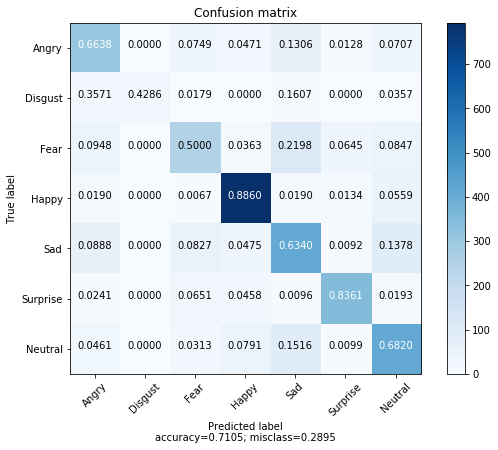

In [75]:
get_conf_matrix_sk(regres, all_pub, pub_test_labels_no_cat)

### VGG

Predicting...
Plotting


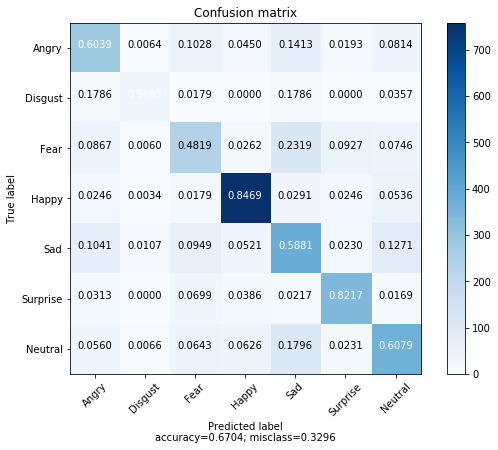

In [83]:
get_conf_matrix(parallel_model_2, resized_pub_test, pub_test_labels_no_cat)

### 221

Predicting...
Plotting


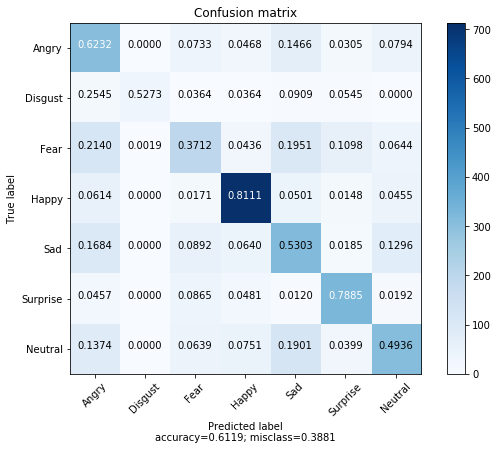

In [79]:
get_conf_matrix(model_221, priv_test_ds, priv_test_labels_no_cat)

### Xception

Predicting...
Plotting


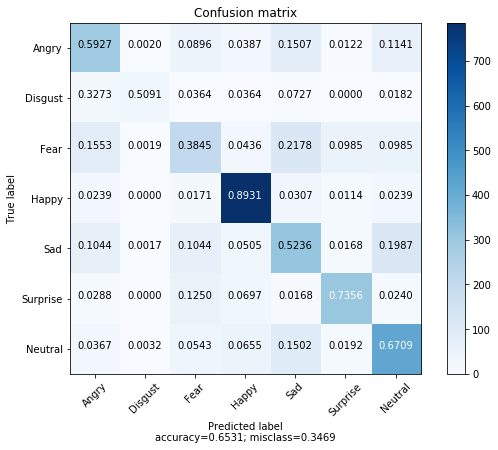

In [81]:
get_conf_matrix(model_xc, priv_test_ds, priv_test_labels_no_cat)